In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import os
import itertools
import ants

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/ants/regrid/esmf.py:26: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/ants/regrid/_ugrid.py:19: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/iris/experimental/raster.py:29: IrisDeprecation: iris.experimental.raster is deprecated since version 3.2, and will be removed in a future release. If you make use of this functionality, please contact the Iris Developers to discuss how to retain it (which may involve reversing the deprecation).
  warn_deprecated(wmsg)


In [58]:
res = "n512e"
file = "/g/data/gb02/public/AM3/ancils/u-dj813_om3-025deg/" + res + "/ozone/sparc/1994-2005/qrclim.ozone_L85_O85"
cubes = ants.load(file)
new_cubes = cubes.copy()

In [51]:
new_cubes[0]

Mass Fraction Of Ozone In Air (1),time,model_level_number,latitude,longitude
Shape,12,85,480,1
Dimension coordinates,,,,
time,x,-,-,-
model_level_number,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
level_height,-,x,-,-
sigma,-,x,-,-
Cell methods,,,,


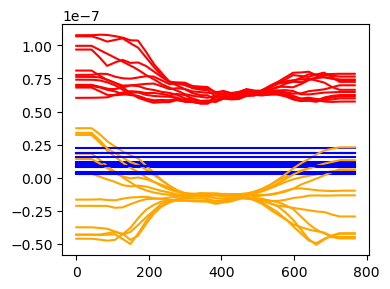

In [59]:
fig, ax = plt.subplots(figsize=(4, 3))

for i in range(12):


    plt.plot(cubes[0].data[i,84,:,0], color = "orange")
    plt.plot(cubes[0].data[i,83,:,0], color = "red")
    
    ozone_values = cubes[0].data[i,84,:,0]
    toa_mean =  np.mean(cubes[0].data[i,84,:,0][cubes[0].data[i,84,:,0] >= 0])

    if np.isnan(toa_mean):
        toa_mean = 0.1e-7

    new_cubes[0].data[i,84,:,0] = toa_mean

    plt.plot(new_cubes[0].data[i,84,:,0], "blue")
    
plt.tight_layout()
plt.show()

In [60]:
folder = "/scratch/gb02/pc2687/ancils/ozone/" + res 
os.makedirs(folder, exist_ok=True)

ants.save(new_cubes, folder + "/qrclim.ozone_L85_O85")